In [1]:
## For this, we do not need specialisied environment, we will use numpy, scipy and matplotlib

import numpy as np
import matplotlib.pyplot as plt

from scipy import integrate

In [2]:
#Universal constants

w = 0.4128

In [3]:
##let us define the functions to use. We will use a large 

def integrand(x, t, tb):
    return np.sin(x*t)/(1 + (x**2)*(tb**2))


def s(t,tk):
    tb = w*np.pi*tk
    I = integrate.quad(integrand, 0, np.inf, args = (t,tb))[0]
    return I

In [4]:
print(s(0,0.08))

0.0


In [5]:
# gamma_imp =    # depends on v_F somehow, have to find that relation
#tk = 3*gamma_imp/(w*(np.pi**2))

def tk_col(theta,theta_k):
    return 2*theta*np.cos(theta)*np.exp(-np.pi*np.sin(theta)/theta_k)

In [6]:
theta_list = [np.pi/3,np.pi/4]
thetak_list = [np.pi/4,np.pi/6]

for theta in theta_list:
    for thetak in thetak_list:
        tk = tk_col(theta,thetak)
        print("Kondo temperature for theta = ",round(theta,3)," and theta_k = ",round(thetak,2)," is ",round(tk,3))

Kondo temperature for theta =  1.047  and theta_k =  0.79  is  0.033
Kondo temperature for theta =  1.047  and theta_k =  0.52  is  0.006
Kondo temperature for theta =  0.785  and theta_k =  0.79  is  0.066
Kondo temperature for theta =  0.785  and theta_k =  0.52  is  0.016


In [7]:
def c_eq(t,tb,tk):
    return (0.25*np.exp(-2*t/tb) - s(t,tk)**2)

In [8]:
def correlator(tw,t,tb,tk):
    val = c_eq(t,tb,tk) - 2*np.exp(-tw/tb)*s(t,tk)*(s(tw,tk)*np.exp(-t/tb) - s(tw+t,tk)) - np.exp(-2*tw/tb)*(s(tw,tk)*np.exp(-t/tb) - s(tw+t,tk))**2
    return val

In [9]:
def plot_sz(tw,theta_list,thetak_list,n = 100):
    t_list = list(range(n))
    for theta in theta_list:
        for thetak in thetak_list:
            val_list = []
            tk = tk_col(theta,thetak)
            tb = w*np.pi*tk
            for t in t_list:
                val_list.append(2*correlator(tw,t,tb,tk))
            plt.plot(t_list,val_list,label = "theta = "+str(round(theta,2))+" and theta_k = "+str(round(thetak,2)))
            plt.xlabel("Time")
            plt.ylabel("magnetization")
            plt.legend()
            plt.show()

            


In [10]:
def plot_corr0(theta_list,thetak_list,n = 100):
    t_list = list(range(n))
    for theta in theta_list:
        for thetak in thetak_list:
            val_list = []
            Tk = tk_col(theta,thetak)
            tk = 1/Tk
            
            tb = w*np.pi*tk
            print("tb = ",tb)
            for t in t_list:
                val_list.append(-np.exp(-t/tb))
            plt.plot(t_list,val_list,label = "theta = "+str(round(theta,2))+" and theta_k = "+str(round(thetak,2)))
            plt.xlabel("Time")
            plt.ylabel("<Sz(t)>")
            plt.title("Analytical Kondo Magnetization function")
            plt.legend()
            plt.show()

def plot_corr0_2(theta,theta_k, n = 100):
    t_list = list(range(n))
    val_list = []
    Tk = tk_col(theta,thetak)
    tk = 1/Tk
    tb = w*np.pi*tk
    print("tb = ",tb)
    for t in t_list:
        val_list.append(-np.exp(-t/tb))
    return val_list
           

tb =  39.56408803448789


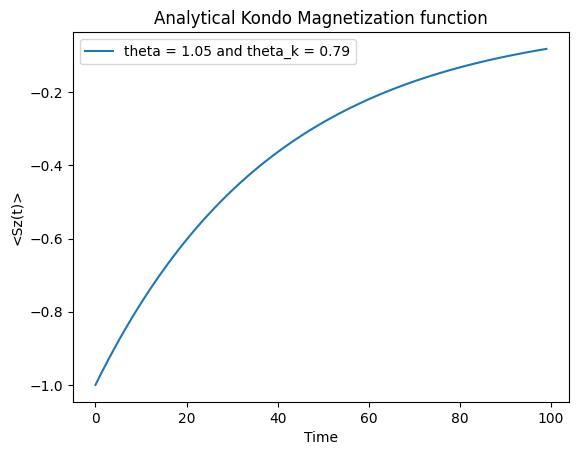

tb =  223.6254706709818


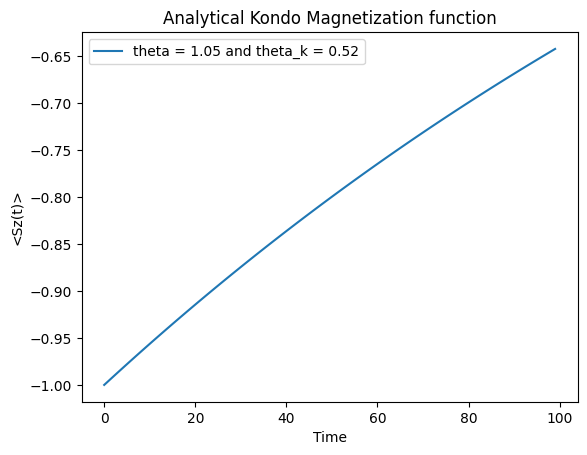

tb =  19.75399660794986


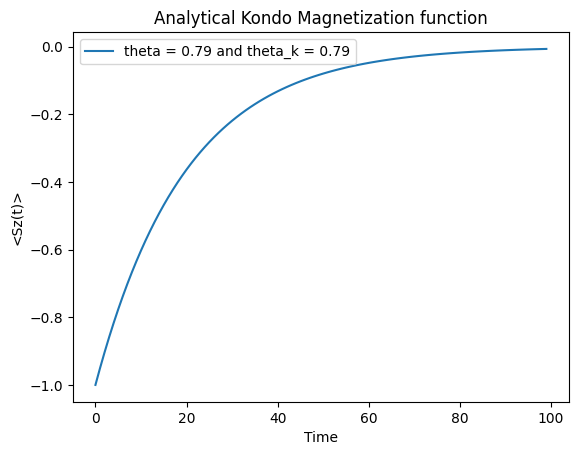

tb =  81.25313403012645


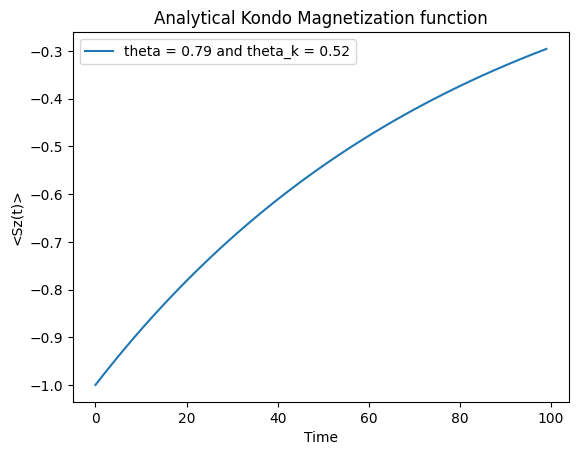

In [11]:
plot_corr0(theta_list,thetak_list)

In [8]:
from scipy.signal import find_peaks
from numpy.fft import fft, ifft

Prominent frequencies for theta_k =  0.82  are  [0.004, 0.01, 0.014]
Time periods for theta_k =  0.82  are  [250.         100.          71.42857143]
Prominent Peak values for theta_k =  0.82  are  [19.17579643890126, 17.203173379598123, 12.264747927777947]


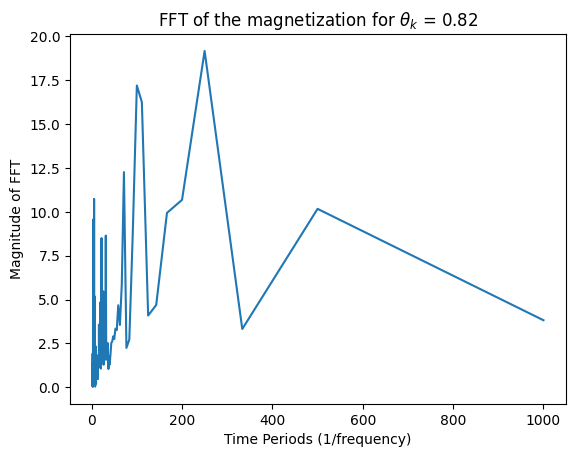

Prominent frequencies for theta_k =  0.72  are  [0.003, 0.007, 0.009000000000000001, 0.012]
Time periods for theta_k =  0.72  are  [333.33333333 142.85714286 111.11111111  83.33333333]
Prominent Peak values for theta_k =  0.72  are  [20.52001380090983, 13.090616326607917, 24.87775910562618, 15.523562065703704]


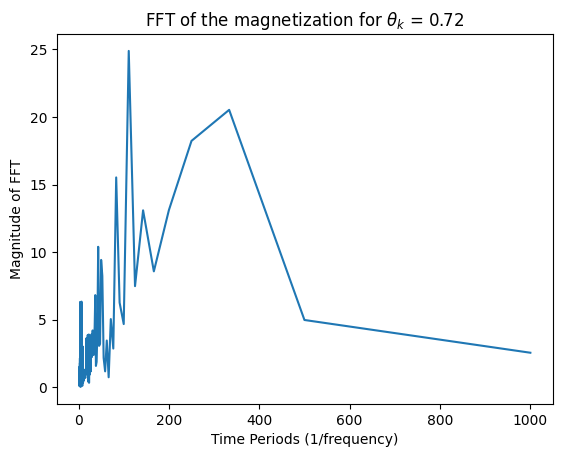

Prominent frequencies for theta_k =  0.65  are  [0.007, 0.01]
Time periods for theta_k =  0.65  are  [142.85714286 100.        ]
Prominent Peak values for theta_k =  0.65  are  [44.81360704032526, 27.849239701626757]


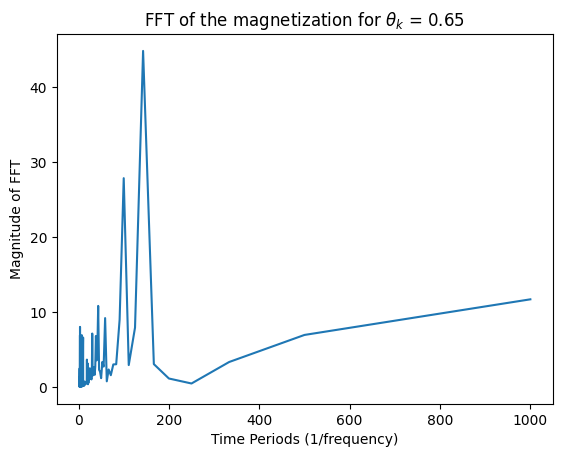

Prominent frequencies for theta_k =  0.62  are  [0.007, 0.011]
Time periods for theta_k =  0.62  are  [142.85714286  90.90909091]
Prominent Peak values for theta_k =  0.62  are  [34.91608001863095, 20.35376580734022]


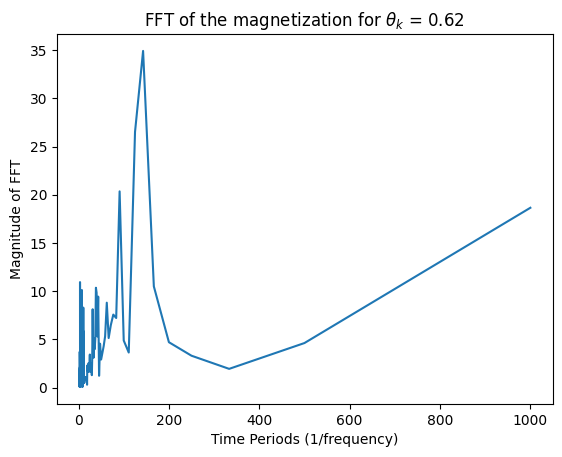

Prominent frequencies for theta_k =  0.55  are  [0.009000000000000001, 0.011, 0.122]
Time periods for theta_k =  0.55  are  [111.11111111  90.90909091   8.19672131]
Prominent Peak values for theta_k =  0.55  are  [38.55104555624152, 28.576970228292907, 13.79449399134181]


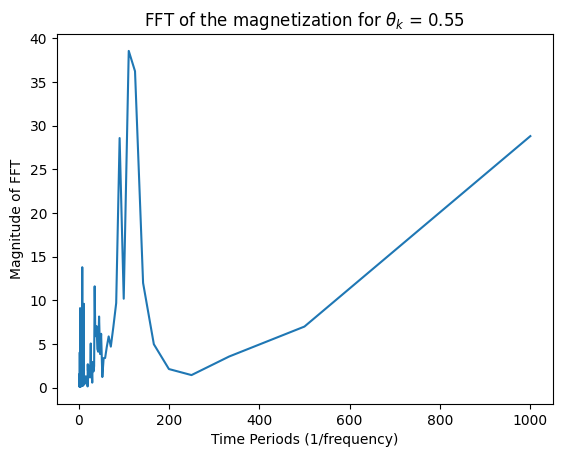

Prominent frequencies for theta_k =  0.52  are  [0.009000000000000001, 0.011, 0.027, 0.082, 0.107, 0.117]
Time periods for theta_k =  0.52  are  [111.11111111  90.90909091  37.03703704  12.19512195   9.34579439
   8.54700855]
Prominent Peak values for theta_k =  0.52  are  [46.34547173617771, 29.386792338232137, 13.482747781478341, 13.440469643966935, 12.815151741052249, 13.114118338644172]


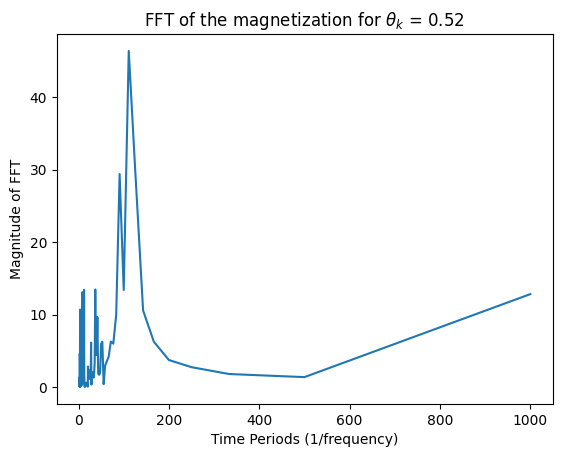

Prominent frequencies for theta_k =  0.45  are  [0.008, 0.01, 0.012, 0.07, 0.095, 0.10300000000000001]
Time periods for theta_k =  0.45  are  [125.         100.          83.33333333  14.28571429  10.52631579
   9.70873786]
Prominent Peak values for theta_k =  0.45  are  [20.215252160154744, 29.54497935182404, 16.74500809322237, 28.773516320611105, 12.730170004218088, 17.319638380859306]


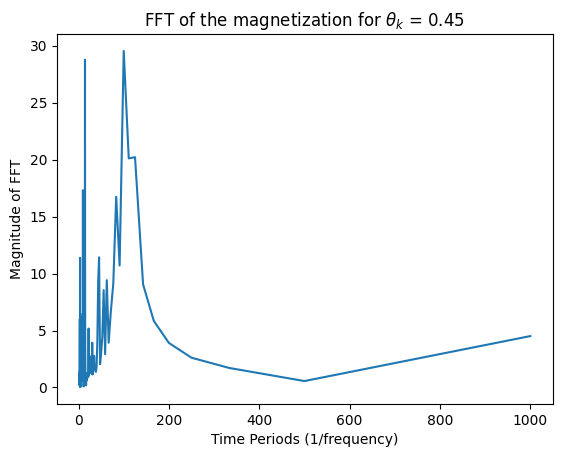

Prominent frequencies for theta_k =  0.42  are  [0.009000000000000001, 0.012, 0.021, 0.065, 0.089, 0.097]
Time periods for theta_k =  0.42  are  [111.11111111  83.33333333  47.61904762  15.38461538  11.23595506
  10.30927835]
Prominent Peak values for theta_k =  0.42  are  [47.98254512457569, 22.748393822075002, 14.026159367703155, 24.257356391526933, 18.84254040458147, 16.270308227955812]


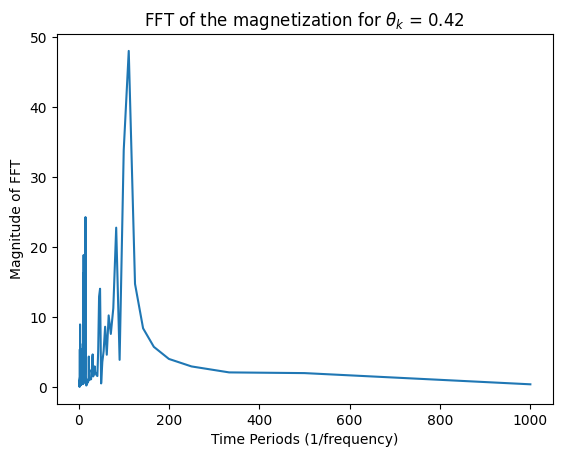

In [25]:
#Let us draw a comparision plot for analytical and numerical magnetization

N = 6
theta= 1.07 #pass the true values here
theta_k_list = [0.82, 0.72, 0.65, 0.62, 0.55,0.52, 0.45, 0.42]
max_trotter_steps = 1000

#i = 0

sz_vals = [0]*max_trotter_steps 
sz_vals2 = [0]*max_trotter_steps
sz_vals3 = [0]*max_trotter_steps
sz_vals4 = [0]*max_trotter_steps
sz_vals5 = [0]*max_trotter_steps

"""for i in range(max_trotter_steps):
    data = np.loadtxt(f"scaled_codes/data/N = {N}, theta = {theta}, theta_k = {theta_k}, t = {i}_sz_TS.txt")
    sz_vals[i] = data[1]
    data = np.loadtxt(f"scaled_codes/data/N = {N}, theta = {theta}, theta_k = {theta_k}, t = {i}_sz.txt")
    sz_vals4[i] = data[1]



for i in range(max_trotter_steps):
    data3 = np.loadtxt(f"scaled_codes/data/N = 8, theta = {theta}, theta_k = {theta_k}, t = {i}_sz_TS.txt")
    sz_vals3[i] = data3[1]"""
for theta_k in theta_k_list:
    for i in range(max_trotter_steps):
        data2 = np.loadtxt(f"../scaled_codes/data/N = 6, theta = {theta}, theta_k = {theta_k}, t = {i}_sz.txt")
        sz_vals2[i-100] = data2[1]  

        #FFT to find out the frequency of the oscillations
    fft1 = fft(sz_vals2)
        #find list of frequencies

    freqs = np.fft.fftfreq(len(sz_vals2))
        #find the peaks
    peaks, _ = find_peaks(np.abs(fft1))
    peaks = peaks[freqs[peaks] > 0]

    #print("Peaks for theta_k = ",theta_k," are ",peaks) #print the peaks
    #print(freqs[peaks]) #print the frequencies with magnitude above 10

    #print the frequencies with magnitude above 10
    prom_freqs = [freqs[i] for i in peaks if np.abs(fft1[i]) > 12]

    time_periods = 1/np.abs(prom_freqs)

    #print("Peaks for theta_k = ",theta_k," are ",peaks) #print the peaks

    print("Prominent frequencies for theta_k = ",theta_k," are ",prom_freqs) #print the prominent frequencies
    print("Time periods for theta_k = ",theta_k," are ",time_periods) #print the time periods

    peak_vals = [np.abs(fft1[i]) for i in peaks if np.abs(fft1[i]) > 12] #find the prominent peak values

    print("Prominent Peak values for theta_k = ",theta_k," are ",peak_vals) #print the peak values

    #Plot only the positive frequencies and the magnitudes at those frequencies

    freqs_pos = freqs[freqs > 0]
    time_periods_1 = 1/freqs_pos
    fft1_pos = fft1[freqs > 0]


        #plot the magnitudes wrt to the frequencies
    plt.plot(time_periods_1,np.abs(fft1_pos))
    plt.xlabel("Time Periods (1/frequency)")
    plt.ylabel("Magnitude of FFT")
    plt.title(r"FFT of the magnetization for $\theta_k$ = " + str(theta_k))
    plt.show()


        
    #data2 = np.loadtxt(f"scaled_codes/data/N = 6, theta = {theta}, theta_k = {theta_k}, t = {i}_sz.txt")
    #sz_vals5[i] = data2[1]     

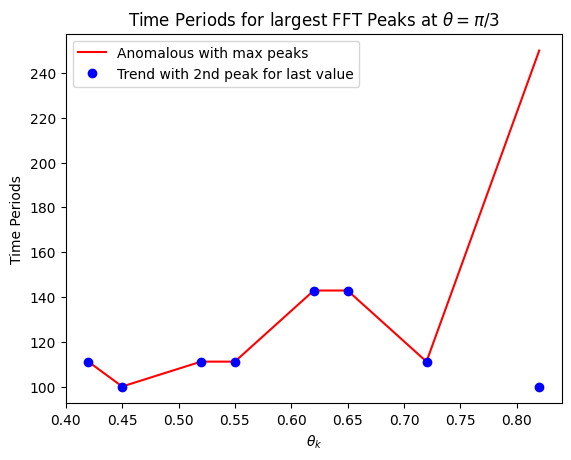

In [36]:
timeperiod_list = [250,111.11111111,142.85714286,142.85714286,111.11111111,111.11111111,100,111.11111111]
timeperiod_list_2 = [100,111.11111111,142.85714286,142.85714286,111.11111111,111.11111111,100,111.11111111]

plt.plot(theta_k_list,timeperiod_list,'r',label = "Anomalous with max peaks")
plt.plot(theta_k_list,timeperiod_list_2,'bo',label = "Trend with 2nd peak for last value")
plt.xlabel(r"$\theta_k$")
plt.ylabel("Time Periods")
plt.legend()
plt.title("Time Periods for largest FFT Peaks at " + r"$\theta = \pi/3$")
plt.show()

Prominent frequencies for theta =  1.07  are  [0.009000000000000001, 0.011, 0.024, 0.027, 0.082, 0.107, 0.117, 0.294, 0.302]
Time periods for theta =  1.07  are  [111.11111111  90.90909091  41.66666667  37.03703704  12.19512195
   9.34579439   8.54700855   3.40136054   3.31125828]
Prominent Peak values for theta =  1.07  are  [46.34547173617771, 29.386792338232134, 9.702374798509782, 13.482747781478341, 13.440469643966935, 12.815151741052247, 13.114118338644172, 8.763237619235857, 10.708440680290357]


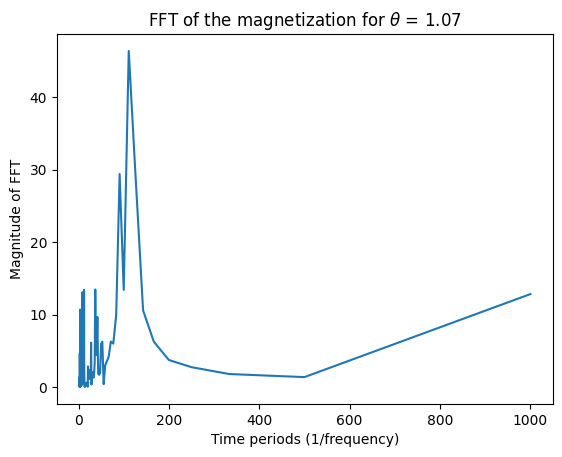

Prominent frequencies for theta =  0.97  are  [0.03, 0.032, 0.057, 0.256]
Time periods for theta =  0.97  are  [33.33333333 31.25       17.54385965  3.90625   ]
Prominent Peak values for theta =  0.97  are  [31.678891512390592, 10.495462019856642, 83.71779279217678, 16.526302812865076]


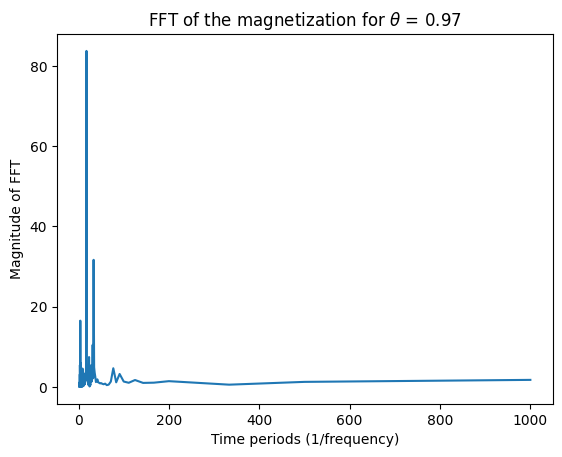

Prominent frequencies for theta =  0.87  are  [0.004, 0.038, 0.078, 0.229]
Time periods for theta =  0.87  are  [250.          26.31578947  12.82051282   4.36681223]
Prominent Peak values for theta =  0.87  are  [60.75190254588039, 12.202758534916436, 44.244304049946756, 10.400013084103831]


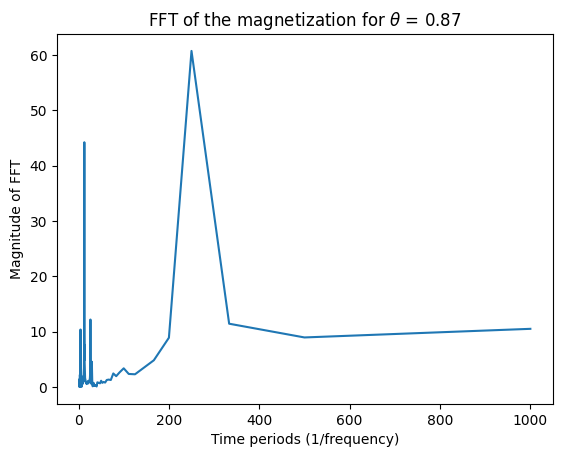

Prominent frequencies for theta =  0.77  are  [0.015, 0.151]
Time periods for theta =  0.77  are  [66.66666667  6.62251656]
Prominent Peak values for theta =  0.77  are  [9.580875891778492, 10.211940893005446]


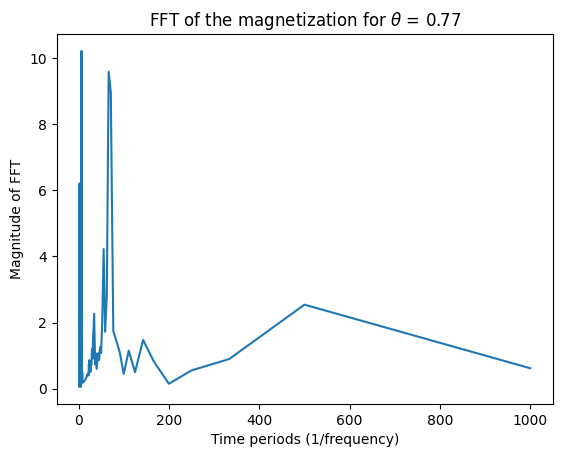

Prominent frequencies for theta =  0.67  are  [0.338]
Time periods for theta =  0.67  are  [2.95857988]
Prominent Peak values for theta =  0.67  are  [9.621795489799592]


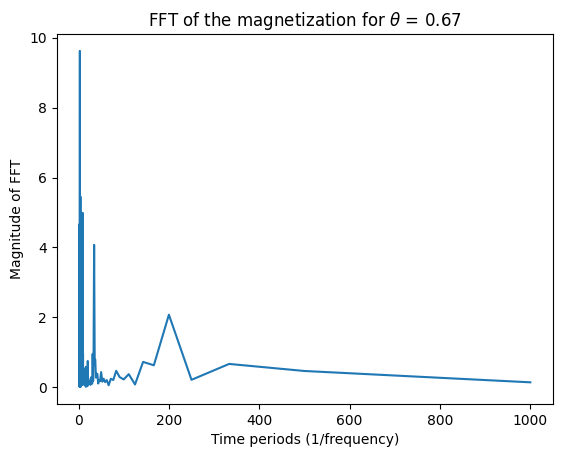

Prominent frequencies for theta =  0.57  are  [0.308]
Time periods for theta =  0.57  are  [3.24675325]
Prominent Peak values for theta =  0.57  are  [14.45697542479689]


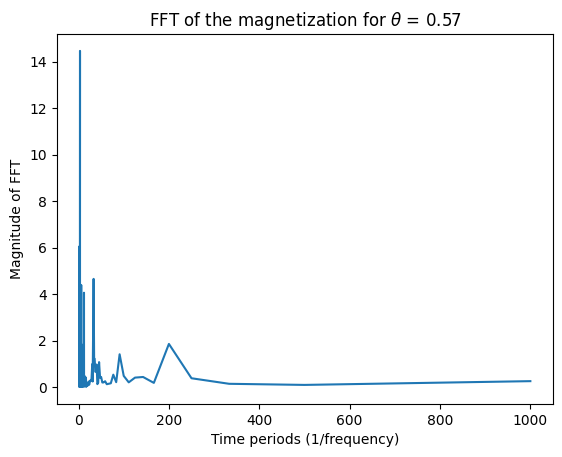

In [24]:
#We do the same, but for thetalist this time

theta_list = [1.07,0.97, 0.87, 0.77, 0.67, 0.57]
theta_k = 0.52
max_trotter_steps = 1000

"""for i in range(max_trotter_steps):
    data = np.loadtxt(f"scaled_codes/data/N = {N}, theta = {theta}, theta_k = {theta_k}, t = {i}_sz_TS.txt")
    sz_vals[i] = data[1]
    data = np.loadtxt(f"scaled_codes/data/N = {N}, theta = {theta}, theta_k = {theta_k}, t = {i}_sz.txt")
    sz_vals4[i] = data[1]



for i in range(max_trotter_steps):
    data3 = np.loadtxt(f"scaled_codes/data/N = 8, theta = {theta}, theta_k = {theta_k}, t = {i}_sz_TS.txt")
    sz_vals3[i] = data3[1]"""
for theta in theta_list:
    for i in range(max_trotter_steps):
        data2 = np.loadtxt(f"../scaled_codes/data/N = 6, theta = {theta}, theta_k = {theta_k}, t = {i}_sz.txt")
        sz_vals3[i] = data2[1]  

        #FFT to find out the frequency of the oscillations
    fft2 = fft(sz_vals3)
        #find list of frequencies

    freqs2 = np.fft.fftfreq(len(sz_vals3))
        #find the peaks
    peaks2, _ = find_peaks(np.abs(fft2))
    peaks2 = peaks2[freqs2[peaks2] > 0]

    #print("Peaks for theta_k = ",theta_k," are ",peaks) #print the peaks
    #print(freqs[peaks]) #print the frequencies with magnitude above 10

    #print the frequencies with magnitude above 10
    prom_freqs2 = [freqs2[i] for i in peaks2 if np.abs(fft2[i]) > 8]

    time_periods2 = 1/np.abs(prom_freqs2)

    #print("Peaks for theta_k = ",theta_k," are ",peaks) #print the peaks

    print("Prominent frequencies for theta = ",theta," are ",prom_freqs2) #print the prominent frequencies
    print("Time periods for theta = ",theta," are ",time_periods2) #print the time periods

    peak_vals2 = [np.abs(fft2[i]) for i in peaks2 if np.abs(fft2[i]) > 8] #find the prominent peak values

    print("Prominent Peak values for theta = ",theta," are ",peak_vals2) #print the peak values

    #Plot only the positive frequencies and the magnitudes at those frequencies

    freqs_pos2 = freqs2[freqs2 > 0]
    time_periods_2 = 1/freqs_pos2
    fft2_pos = fft2[freqs2 > 0]


        #plot the magnitudes wrt to the frequencies
    plt.plot(time_periods_2,np.abs(fft2_pos))
    plt.xlabel("Time periods (1/frequency)")
    plt.ylabel("Magnitude of FFT")
    plt.title(r"FFT of the magnetization for $\theta$ = " + str(theta))
    plt.show()


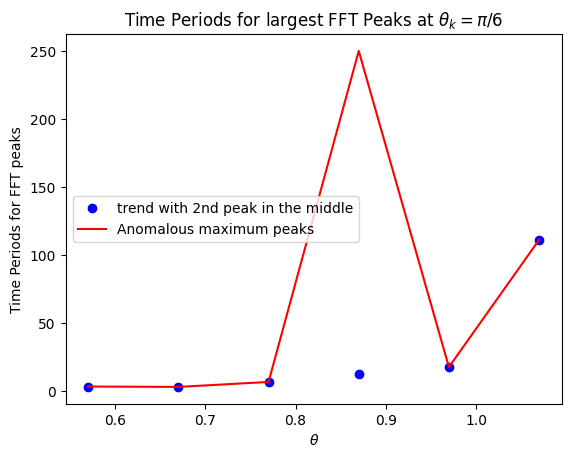

In [35]:
timeperiod_list2 = [111.11111111,17.54385965,12.82051282,6.62251656,2.95857988,3.24675325]  #selecting the time periods from the FFT peaks
timeperiod_list3 = [111.11111111,17.54385965,250,6.62251656,2.95857988,3.24675325]

plt.plot(theta_list,timeperiod_list2, 'bo', label = "trend with 2nd peak in the middle")
plt.plot(theta_list,timeperiod_list3, 'r', label = "Anomalous maximum peaks")
plt.xlabel(r"$\theta$")
plt.ylabel("Time Periods for FFT peaks")
plt.legend()

plt.title("Time Periods for largest FFT Peaks at " + r"$\theta_k = \pi/6$")
plt.show()


In [25]:
val_list = plot_corr0_2(np.pi/3,np.pi/4, n = 400)

tb =  223.6254706709818


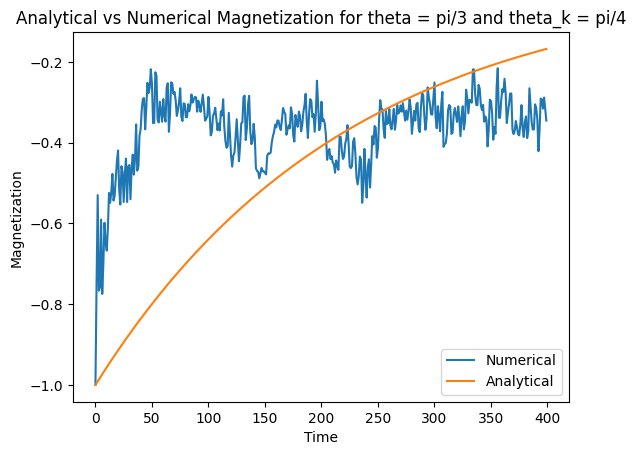

In [26]:
## Now we will plot the magnetization values
t_list = list(range(400))

plt.plot(t_list,sz_vals2,label = "Numerical")
plt.plot(t_list,val_list,label = "Analytical")

plt.xlabel("Time")
plt.ylabel("Magnetization")
plt.title("Analytical vs Numerical Magnetization for theta = pi/3 and theta_k = pi/4")

plt.legend()


Text(0.5, 1.0, '$t_b$ as a function of $\\theta_k$ for constant $\\theta$')

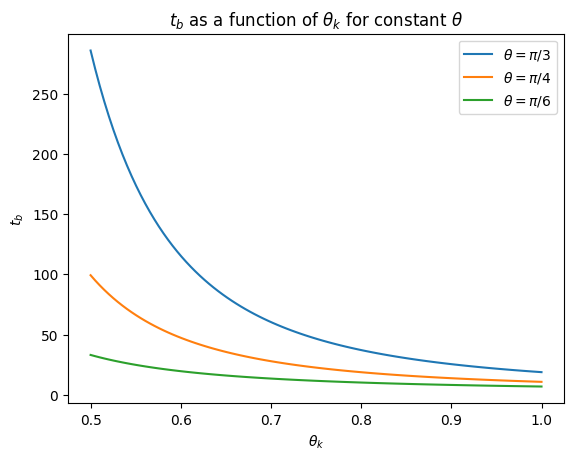

In [10]:
## Let us plot tb as a function of theta_k

theta1 = np.pi/3
theta2 = np.pi/4
theta3 = np.pi/6

theta_k_list1 = np.linspace(0.5,1,100)
theta_k_list2 = np.linspace(0.5,1,100)
theta_k_list3 = np.linspace(0.5,1,100)
tb_list1 = []
tb_list2 = []
tb_list3 = []
for theta_k in theta_k_list1:
    tb_list1.append(w*np.pi/tk_col(theta1,theta_k))

for theta_k in theta_k_list2:
    tb_list2.append(w*np.pi/tk_col(theta2,theta_k))

for theta_k in theta_k_list3:
    tb_list3.append(w*np.pi/tk_col(theta3,theta_k))

plt.plot(theta_k_list1,tb_list1, label = r"$\theta = \pi/3$")
plt.plot(theta_k_list2,tb_list2, label = r"$\theta = \pi/4$")
plt.plot(theta_k_list3,tb_list3, label = r"$\theta = \pi/6$")
plt.xlabel(r"$\theta_k$")
plt.ylabel(r"$t_b$")
plt.legend()
plt.title(r"$t_b$ as a function of $\theta_k$ for constant $\theta$")